# Estudo sobre Regressão no scikit-learn (sklearn) em Python

## Objetivo:
O objetivo deste estudo é explorar o uso da regressão utilizando a biblioteca scikit-learn (sklearn) em Python. A regressão é uma técnica fundamental na análise de dados que permite modelar e prever relações entre variáveis. Vamos aprender como aplicar modelos de regressão para fazer previsões, avaliar a qualidade dessas previsões e entender como ajustar os modelos para obter melhores resultados.

### Subobjetivos:
- Compreender os conceitos básicos de regressão e sua importância na análise de dados.
- Aprofundar a utilizar a biblioteca scikit-learn para implementar modelos de regressão.
- Explorar diferentes tipos de regressão, incluindo regressão linear, regressão polinomial e regressão de árvore de decisão.
- Entender como dividir conjuntos de dados em treinamento e teste para avaliar o desempenho do modelo.
- Aplicar técnicas de avaliação de modelos, como métricas de erro (RMSE, MAE) e coeficiente de determinação (R²).
- Realizar ajustes nos modelos de regressão e selecionar recursos relevantes.
- Lidar com desafios comuns na regressão, como overfitting e underfitting.

### Resumo:
Este estudo concentra-se na implementação de modelos de regressão utilizando a biblioteca scikit-learn. A regressão é uma técnica estatística crucial para prever um valor numérico com base em um conjunto de variáveis independentes. Ao longo do estudo, exploraremos diversos tipos de regressão, como a regressão linear, que assume uma relação linear entre as variáveis, e a regressão de árvore de decisão, que pode capturar relações mais complexas. Aprenderemos a avaliar o desempenho dos modelos usando métricas apropriadas e ajustar os modelos para obter melhores resultados.

### Dificuldades:
- Seleção de Modelo: Escolher o tipo certo de modelo de regressão para um conjunto de dados específico pode ser desafiador, pois diferentes modelos podem ser mais adequados para diferentes tipos de dados e relações entre variáveis.
- Avaliação de Desempenho: Interpretar métricas de avaliação, como RMSE e R², pode ser complexo. É necessário entender o que essas métricas representam e como interpretar os resultados.
- Overfitting e Underfitting: Encontrar um equilíbrio entre um modelo muito simples (underfitting) e um modelo muito complexo (overfitting) pode ser complicado. Compreender como ajustar os hiperparâmetros do modelo é fundamental.
- Feature Engineering: Identificar quais variáveis são mais relevantes para o modelo e realizar a engenharia de recursos pode ser desafiador. Selecionar as variáveis certas pode afetar significativamente o desempenho do modelo.
- Interpretação do Modelo: Interpretar os resultados do modelo, especialmente em modelos mais complexos, como a regressão de árvore de decisão, pode ser complexo e exigir conhecimento adicional.

Superar essas dificuldades requer prática, experimentação e compreensão dos conceitos subjacentes. Ao longo do estudo, desenvolverá habilidades para lidar com esses desafios e aplicar efetivamente a regressão em problemas do mundo real. Nesse caso em específico o modelo poderia ser melhorado com mais dados como: ano de construção, condição da construção, acabamento, e etc., podendo ser usado em uma corretora de imóveis, agregando mais valor a estrutura tomadora de decisão tanto para os corretores como para os clientes.

# Projeto:

In [1]:
import pandas as pd
df = pd.read_csv('scraping_imoveis_rj.csv')
df

Unnamed: 0                                          Nome     area  \
0               0    Apartamento com 2 Quartos à Venda, 130m²       130    
1               1                                        SEND     28-68    
2               2     Apartamento com 3 Quartos à Venda, 88m²        88    
3               3     Apartamento com 3 Quartos à Venda, 84m²        84    
4               4     Apartamento com 2 Quartos à Venda, 62m²        62    
...           ...                                           ...      ...   
66487       66487     Apartamento com 2 Quartos à Venda, 50m²        50    
66488       66488     Apartamento com 2 Quartos à Venda, 50m²        50    
66489       66489     Apartamento com 2 Quartos à Venda, 78m²        78    
66490       66490    Apartamento com 3 Quartos à Venda, 150m²       150    
66491       66491     Apartamento com 3 Quartos à Venda, 91m²        91    

      quartos  banheiros    garagem    preco  
0          2           2     1        997000  
1          2           1    --        367000  
2          1           1     1        450000  
3          1           2     1        689000  
4          1           2     2        350000  
...       ...        ...        ...      ...  
66487      3           1     1        219999  
66488      1           1     1        245000  
66489      2           2     1        540000  
66490      3           4     1       2900000  
66491      2           2     1        550000  

[66492 rows x 7 columns]

### Tratando os dados

In [2]:
df.drop(['Unnamed: 0','Nome'], axis=1, inplace=True)
df

area quartos  banheiros    garagem    preco
0         130       2           2     1        997000
1       28-68       2           1    --        367000
2          88       1           1     1        450000
3          84       1           2     1        689000
4          62       1           2     2        350000
...        ...     ...        ...        ...      ...
66487      50       3           1     1        219999
66488      50       1           1     1        245000
66489      78       2           2     1        540000
66490     150       3           4     1       2900000
66491      91       2           2     1        550000

[66492 rows x 5 columns]

In [3]:
df['area'].unique()

array([' 130 ', ' 28-68 ', ' 88 ', ' 84 ', ' 62 ', ' 64 ', ' 43 ', ' 55 ',
       ' 32-43 ', ' 60 ', ' 79 ', ' 58 ', ' 53 ', ' 114 ', ' 33-79 ',
       ' 48 ', ' 63 ', ' 120 ', ' 80 ', ' 70 ', ' 170 ', ' 75 ', ' 77 ',
       ' 83 ', ' 71 ', ' 59 ', ' 67 ', ' 51 ', ' 52 ', ' 85 ', ' 54 ',
       ' 86 ', ' 100 ', ' 57 ', ' 50 ', ' 127 ', ' 97 ', ' 281 ', ' 98 ',
       ' 74 ', ' 72 ', ' 92 ', ' 56 ', ' 65 ', ' 76 ', ' 91 ', ' 40 ',
       ' 87 ', ' 36 ', ' 152 ', ' 102 ', ' 68 ', ' 78 ', ' 150 ', ' 82 ',
       ' 90 ', ' 95 '], dtype=object)

In [4]:
# Criando uma máscara booleana para cada coluna que contém hífen
mascara_area = df['area'].str.contains('-', na=False)
mascara_quartos = df['quartos'].str.contains('-', na=False)
mascara_garagem = df['garagem'].str.contains('-', na=False)

In [5]:
# Combinando as máscaras para identificar as linhas a serem excluídas
mascara_total = mascara_area | mascara_quartos | mascara_garagem

# Aplicando a máscara para excluir as linhas
df = df[~mascara_total]
df

area quartos  banheiros   garagem    preco
0       130       2           2    1        997000
2        88       1           1    1        450000
3        84       1           2    1        689000
4        62       1           2    2        350000
6        43       3           1    1        112403
...      ...     ...        ...       ...      ...
66487    50       3           1    1        219999
66488    50       1           1    1        245000
66489    78       2           2    1        540000
66490   150       3           4    1       2900000
66491    91       2           2    1        550000

[49054 rows x 5 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49054 entries, 0 to 66491
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       49054 non-null  object
 1   quartos    49054 non-null  object
 2   banheiros  49054 non-null  int64 
 3   garagem    49054 non-null  object
 4   preco      49054 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ MB


In [7]:
# Passando tipos para inteiros
df['area'] = df['area'].astype(int)
df['quartos'] = df['quartos'].astype(int)
df['garagem'] = df['garagem'].astype(int)

C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\2734206175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].astype(int)
C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\2734206175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quartos'] = df['quartos'].astype(int)
C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\2734206175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49054 entries, 0 to 66491
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       49054 non-null  int32
 1   quartos    49054 non-null  int32
 2   banheiros  49054 non-null  int64
 3   garagem    49054 non-null  int32
 4   preco      49054 non-null  int64
dtypes: int32(3), int64(2)
memory usage: 1.7 MB


In [9]:
# Verificando dados null
df.isnull().sum()

area         0
quartos      0
banheiros    0
garagem      0
preco        0
dtype: int64

In [10]:
# Verificando dados NaN
df.isna().sum()

area         0
quartos      0
banheiros    0
garagem      0
preco        0
dtype: int64

In [11]:
df.columns

Index(['area', 'quartos', 'banheiros', 'garagem', 'preco'], dtype='object')

In [12]:
df.describe()

area       quartos     banheiros       garagem         preco
count  49054.000000  49054.000000  49054.000000  49054.000000  4.905400e+04
mean      73.826293      1.765463      1.933930      1.128450  4.581144e+05
std       25.512802      0.740898      0.767552      0.345918  3.285161e+05
min       43.000000      1.000000      1.000000      1.000000  6.800400e+04
25%       57.000000      1.000000      1.000000      1.000000  2.399000e+05
50%       64.000000      2.000000      2.000000      1.000000  3.500000e+05
75%       80.000000      2.000000      3.000000      1.000000  5.400000e+05
max      281.000000      5.000000      5.000000      4.000000  2.900000e+06

## Correlação dos dados

In [13]:
df.corr()

area   quartos  banheiros   garagem     preco
area       1.000000  0.044192   0.586818  0.230117  0.738388
quartos    0.044192  1.000000   0.121091  0.070143  0.040188
banheiros  0.586818  0.121091   1.000000  0.267222  0.547767
garagem    0.230117  0.070143   0.267222  1.000000  0.420487
preco      0.738388  0.040188   0.547767  0.420487  1.000000

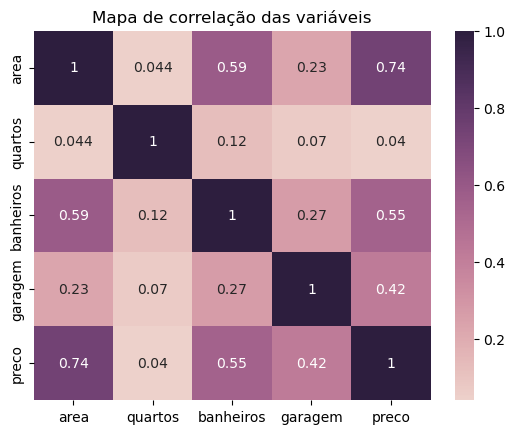

In [14]:
# PLotando em gráfico a correlação dos dados
import seaborn as sns
ax = sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação das variáveis')
ax=ax

### Boxplot das variáveis

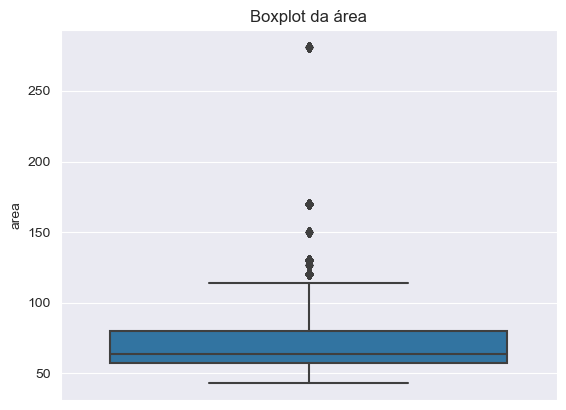

In [15]:
sns.set_style('darkgrid')
ax = sns.boxplot(data=df, y='area')
ax.set_title('Boxplot da área')
ax=ax

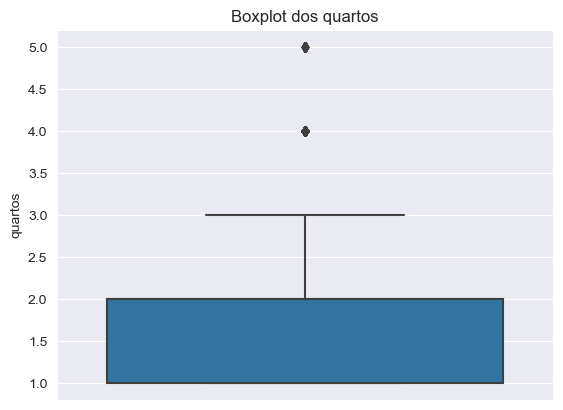

In [16]:
ax = sns.boxplot(data=df, y='quartos')
ax.set_title('Boxplot dos quartos')
ax=ax

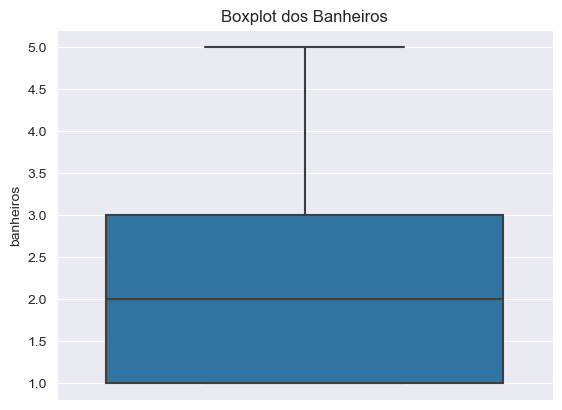

In [17]:
ax = sns.boxplot(data=df, y='banheiros')
ax.set_title('Boxplot dos Banheiros')
ax=ax

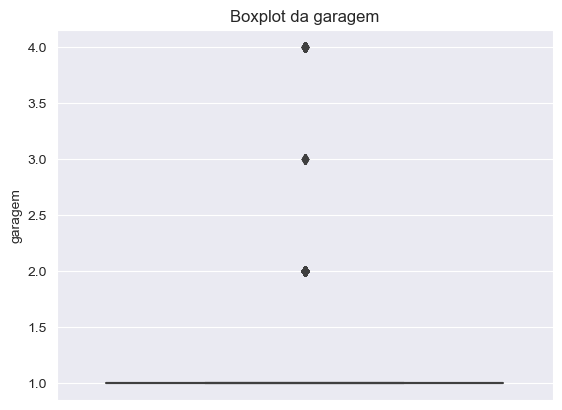

In [18]:
ax = sns.boxplot(data=df, y='garagem')
ax.set_title('Boxplot da garagem')
ax=ax

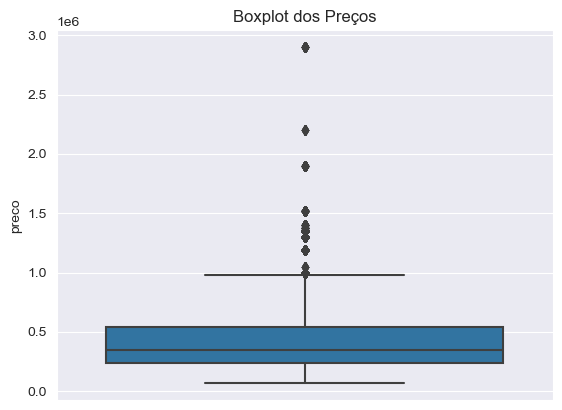

In [19]:
ax = sns.boxplot(data=df, y='preco')
ax.set_title('Boxplot dos Preços')
ax=ax

## Separando os dados para treino e teste

In [20]:
X = df.drop(columns=['preco'])
y = df['preco']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

In [21]:
# Métricas para avaliação do modelo de ML
from sklearn.metrics import r2_score, explained_variance_score,mean_squared_error,mean_absolute_error,d2_absolute_error_score
import numpy as np
import matplotlib.pyplot as plt

# Função para evitar a repetição de linhas em todos os modelos
def metricas(modelo):
    r2 = (r2_score(y_test, modelo)*100)
    mse = mean_squared_error(y_test, modelo)
    mae = mean_absolute_error(y_test, modelo)
    print("Coeficiente de determinação R² da previsão: %.2f" % r2)# O melhor possível para R² é 1.0, se negativo o modelo é ruim
    print("Perda de regressão de erro absoluto médio: %.0f" % mae)
    print("Perda de regressão de erro quadrático médio: %.0f" % mse)
    print('-'*60)

# Modelos de regressão do Scikit-Learn:

### Modelos de Regressão Linear

##### Linear Regression
Regressão Linear é um método estatístico usado para modelar a relação entre uma variável dependente (alvo) e uma ou mais variáveis independentes (características). O objetivo da regressão linear é encontrar uma linha reta (ou hiperplano em dimensões mais altas) que melhor se ajusta aos dados, minimizando a diferença entre as previsões do modelo e os valores reais observados.

In [22]:
%%time
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
predicao = lr.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 61.95
Perda de regressão de erro absoluto médio: 136275
Perda de regressão de erro quadrático médio: 42499275821
------------------------------------------------------------
CPU times: total: 172 ms
Wall time: 229 ms


##### Ridge
É uma técnica de regularização usada em modelos de regressão, incluindo a regressão linear, para lidar com problemas de multicolinearidade (alta correlação entre variáveis independentes) e reduzir a variância do modelo.

Na Regressão Ridge, a função de custo é ajustada ao adicionar uma penalização à soma dos quadrados dos coeficientes (pesos) do modelo. Isso ajuda a controlar os valores dos coeficientes, evitando que eles se tornem muito grandes e sensíveis a pequenas variações nos dados. A penalização é controlada por um hiperparâmetro chamado "alfa" (α), que determina o grau de regularização aplicado ao modelo.

A principal vantagem da Regressão Ridge é que ela ajuda a melhorar a estabilidade do modelo e reduzir a chance de overfitting, especialmente quando há multicolinearidade nos dados. No entanto, ao fazer isso, a regressão Ridge pode introduzir um pequeno viés no modelo, o que é um trade-off aceitável em troca de um modelo mais geral e robusto.

In [23]:
%%time
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train,y_train)
predicao = ridge.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 61.95
Perda de regressão de erro absoluto médio: 136275
Perda de regressão de erro quadrático médio: 42499346584
------------------------------------------------------------
CPU times: total: 62.5 ms
Wall time: 28.7 ms


##### Lasso
A técnica de Lasso (Least Absolute Shrinkage and Selection Operator) é uma forma de regularização em modelos de regressão que ajuda a reduzir a complexidade ao forçar certos coeficientes a zero. Isso ajuda na seleção automática de recursos e redução da dimensionalidade. A Lasso adiciona um termo de penalidade à função de custo, controlado pelo hiperparâmetro α. Coeficientes menos importantes são encolhidos para zero, resultando em um modelo mais simples.

In [24]:
%%time
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
predicao = lasso.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 61.95
Perda de regressão de erro absoluto médio: 136275
Perda de regressão de erro quadrático médio: 42499279518
------------------------------------------------------------
CPU times: total: 31.2 ms
Wall time: 29.3 ms


##### ElasticNet
ElasticNet é uma técnica de regularização que combina as características da regressão Ridge e da regressão Lasso. Ela adiciona tanto os termos de penalização L1 (Lasso) quanto L2 (Ridge) à função de custo, controlados pelos hiperparâmetros α e ρ. Isso resulta em um modelo que pode selecionar automaticamente características importantes, enquanto também lida com multicolinearidade e evita overfitting. O ElasticNet é especialmente útil quando há um grande número de características.

In [25]:
%%time
from sklearn.linear_model import ElasticNet

elasticanet = ElasticNet(random_state=0)
elasticanet.fit(X_train,y_train)
predicao = elasticanet.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 57.37
Perda de regressão de erro absoluto médio: 135267
Perda de regressão de erro quadrático médio: 47614975720
------------------------------------------------------------
CPU times: total: 31.2 ms
Wall time: 24.6 ms


# Regressão Não Linear:

###### SVR (Support Vector Regression)
SVR (Support Vector Regression) é um algoritmo de regressão baseado em máquinas de vetor de suporte, uma técnica popular na área de aprendizado de máquina. A SVR busca encontrar uma função que melhor se ajuste aos dados de treinamento enquanto mantém um limite de erro definido. Em vez de tentar minimizar a diferença entre as previsões e os valores reais, como em métodos de regressão tradicionais, a SVR se concentra em manter o erro dentro de uma faixa aceitável, determinada pelos hiperparâmetros C (custo) e ε (insensibilidade).

A SVR mapeia os dados de entrada em um espaço de características de alta dimensão e procura encontrar um hiperplano (ou curva, dependendo da função do kernel usada) que melhor se ajuste aos dados, considerando os exemplos de treinamento mais próximos, chamados de vetores de suporte. Isso permite que a SVR capture padrões complexos nos dados, especialmente em casos em que a relação entre as variáveis não é linear.

In [26]:
%%time
from sklearn import svm

svr = svm.SVR()
svr.fit(X_train,y_train)
predicao = svr.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: -9.10
Perda de regressão de erro absoluto médio: 224440
Perda de regressão de erro quadrático médio: 121853200433
------------------------------------------------------------
CPU times: total: 4min 19s
Wall time: 5min 13s


##### Stochastic Gradient Descent
Stochastic Gradient Descent (SGD), ou Descida de Gradiente Estocástico, é um algoritmo de otimização amplamente utilizado para treinar modelos de aprendizado de máquina, incluindo modelos de regressão e classificação. É uma variação do método de otimização de descida de gradiente que usa uma abordagem estocástica, ou seja, uma amostra aleatória dos dados de treinamento, para atualizar os pesos do modelo em cada iteração.

O SGD é especialmente útil quando se lida com conjuntos de dados grandes, pois atualiza os pesos com base em um pequeno subconjunto dos dados em cada iteração, em vez de usar todo o conjunto de dados, como na descida de gradiente tradicional. Isso torna o processo de treinamento mais eficiente e permite que o algoritmo se adapte rapidamente a mudanças nos dados.

O SGD é usado para ajustar os pesos de um modelo de acordo com a direção do gradiente da função de perda em relação aos pesos. Ele ajusta os pesos iterativamente para minimizar a função de perda, permitindo que o modelo se ajuste aos dados de treinamento.

In [27]:
%%time
from sklearn.linear_model import SGDRegressor

SGDR = SGDRegressor(max_iter=1000, tol=1e-3)
SGDR.fit(X_train,y_train)
predicao = SGDR.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: -2304574.96
Perda de regressão de erro absoluto médio: 42586039
Perda de regressão de erro quadrático médio: 2574111751287100
------------------------------------------------------------
CPU times: total: 375 ms
Wall time: 424 ms


##### Decision Tree
Decision Tree (Árvore de Decisão) é um algoritmo de aprendizado de máquina amplamente utilizado para tarefas de classificação e regressão. Ele modela a decisão através de uma estrutura hierárquica de nós, onde cada nó representa uma escolha baseada em uma característica dos dados. A árvore é construída de maneira recursiva, dividindo os dados em subconjuntos com base nas características que melhor separam as classes ou explicam a variação na variável alvo.

Cada nó interno da árvore representa uma decisão (uma pergunta sobre uma característica) e tem ramos que levam a outros nós ou folhas. As folhas representam as classes para problemas de classificação ou valores de saída para problemas de regressão. A construção da árvore envolve a escolha das melhores características para dividir os dados em cada nó, normalmente usando critérios como ganho de informação, índice Gini ou erro quadrático médio.

As árvores de decisão têm a vantagem de serem facilmente interpretáveis e visualizáveis. No entanto, elas podem ser suscetíveis a overfitting se forem muito complexas. Para lidar com isso, abordagens como a poda (redução) da árvore ou o uso de técnicas de ensemble, como Random Forests e Gradient Boosting, são comumente empregadas.

In [28]:
%%time
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0, max_depth=15)
tree.fit(X_train,y_train)
predicao = tree.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20130
Perda de regressão de erro quadrático médio: 3016017251
------------------------------------------------------------
CPU times: total: 250 ms
Wall time: 203 ms


##### Random Forest
Random Forest é um algoritmo de aprendizado de máquina que pertence à categoria de Ensemble Methods (métodos de conjunto). Ele é construído sobre a base de árvores de decisão e é utilizado para tarefas de classificação e regressão. O Random Forest cria várias árvores de decisão independentes e as combina para produzir resultados mais robustos e precisos.

In [29]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=13, random_state=0)
rf.fit(X_train,y_train)
predicao = rf.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20146
Perda de regressão de erro quadrático médio: 3016694552
------------------------------------------------------------
CPU times: total: 2.36 s
Wall time: 2.7 s


##### Gradient Boosting
A principal ideia por trás do Gradient Boosting é combinar várias árvores de decisão sequencialmente, onde cada nova árvore é ajustada para corrigir os erros das árvores anteriores. Isso é feito através do ajuste do gradiente da função de perda em relação às previsões do modelo. O processo é repetido várias vezes, e cada nova árvore é ajustada para se concentrar nas instâncias que foram previamente mal previstas.

In [30]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train,y_train)
predicao = gb.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 95.55
Perda de regressão de erro absoluto médio: 42230
Perda de regressão de erro quadrático médio: 4968672846
------------------------------------------------------------
CPU times: total: 1.78 s
Wall time: 2.05 s


##### AdaBoost
A ideia principal do AdaBoost é ajustar uma série de classificadores fracos sequencialmente, onde cada classificador subsequente se concentra nas instâncias mal classificadas pelos classificadores anteriores. A ideia-chave é dar mais peso às instâncias que foram mal classificadas, permitindo que os classificadores subsequentes aprendam com os erros dos anteriores.

In [31]:
%%time
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(random_state=0, n_estimators=100)
ab.fit(X_train,y_train)
predicao = ab.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 83.89
Perda de regressão de erro absoluto médio: 96671
Perda de regressão de erro quadrático médio: 17989715428
------------------------------------------------------------
CPU times: total: 438 ms
Wall time: 511 ms


# Regressão por Vizinhança

##### KNeighbors
É baseado no princípio de que instâncias semelhantes tendem a ter rótulos ou valores similares. Para regressão, prevê um valor calculando a média ou a mediana dos valores das instâncias vizinhas.

In [32]:
%%time
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=11)
kn.fit(X_train,y_train)
predicao = kn.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.04
Perda de regressão de erro absoluto médio: 21698
Perda de regressão de erro quadrático médio: 3303641163
------------------------------------------------------------
CPU times: total: 500 ms
Wall time: 563 ms


# Redes Neurais
Redes Neurais Artificiais são modelos de aprendizado de máquina inspirados no funcionamento do cérebro humano. Elas consistem em redes de unidades interconectadas, chamadas neurônios artificiais ou nós, que processam e transformam dados para realizar tarefas como classificação, regressão, reconhecimento de padrões e muito mais.

As redes neurais são compostas por camadas, cada uma com seus próprios neurônios. A estrutura mais comum é a feedforward neural network (rede neural de alimentação direta), onde os dados passam através das camadas em uma única direção, da entrada para a saída.

In [33]:
%%time
from sklearn.neural_network import MLPRegressor

rn = MLPRegressor(random_state=1, max_iter=200)
rn.fit(X_train,y_train)
predicao = rn.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 49.37
Perda de regressão de erro absoluto médio: 164762
Perda de regressão de erro quadrático médio: 56548671786
------------------------------------------------------------
CPU times: total: 2min 4s
Wall time: 1min 19s


C:\Users\otaci\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Tentativa de colocar as variáveis como 0 ou 1

Algoritmos de Machine Learning muitas vezes se beneficiam quando os dados são pré-processados e normalizados para um intervalo entre 0 e 1. Essa técnica é conhecida como "normalização" ou "escala de recursos" (feature scaling). Existem algumas razões pelas quais isso pode ajudar no aprendizado do algoritmo:

- Estabilidade numérica: Alguns algoritmos de Machine Learning, como redes neurais e métodos baseados em gradientes, podem sofrer de problemas numéricos quando os dados estão em diferentes escalas. Normalizando os dados para o intervalo entre 0 e 1 ajuda a evitar esses problemas, permitindo que os algoritmos convergam mais rapidamente e de maneira mais estável.

- Equilíbrio de recursos: Quando as características (features) dos dados estão em diferentes escalas, algumas características podem dominar sobre as outras em termos de influência no algoritmo de aprendizado. A normalização ajuda a equilibrar a contribuição das diferentes características, garantindo que nenhuma característica tenha mais peso apenas por estar em uma escala maior.

- Regularização: Alguns algoritmos, como regressão linear ou regressão logística, aplicam regularização aos coeficientes das características. A normalização dos dados pode ajudar a regularização a funcionar melhor, evitando que as características com escalas maiores dominem a regularização.

- Convergência mais rápida: Normalmente, quando os dados estão em uma escala mais uniforme, os algoritmos de otimização têm menos obstáculos para encontrar o mínimo global da função de perda. Isso pode levar a uma convergência mais rápida durante o treinamento.

- Redução do impacto de outliers: Outliers (valores extremos) podem afetar negativamente o desempenho do algoritmo, especialmente se eles estiverem em uma escala muito diferente do restante dos dados. A normalização pode ajudar a mitigar o impacto dos outliers, pois eles serão trazidos para uma escala mais próxima dos valores normais.

- Comparabilidade entre algoritmos: Normalizando os dados para um intervalo específico (como 0 a 1) facilita a comparação de diferentes algoritmos, uma vez que todos eles estarão operando na mesma escala.

No entanto, é importante observar que nem todos os algoritmos exigem normalização e que a abordagem específica pode variar dependendo do algoritmo e do tipo de dados em questão. Alguns algoritmos, como árvores de decisão e métodos baseados em regras, não são sensíveis a diferenças de escala. Portanto, ao escolher normalizar os dados, é essencial considerar o contexto do problema e a natureza do algoritmo a ser utilizado.

In [34]:
df

area  quartos  banheiros  garagem    preco
0       130        2          2        1   997000
2        88        1          1        1   450000
3        84        1          2        1   689000
4        62        1          2        2   350000
6        43        3          1        1   112403
...     ...      ...        ...      ...      ...
66487    50        3          1        1   219999
66488    50        1          1        1   245000
66489    78        2          2        1   540000
66490   150        3          4        1  2900000
66491    91        2          2        1   550000

[49054 rows x 5 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49054 entries, 0 to 66491
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       49054 non-null  int32
 1   quartos    49054 non-null  int32
 2   banheiros  49054 non-null  int64
 3   garagem    49054 non-null  int32
 4   preco      49054 non-null  int64
dtypes: int32(3), int64(2)
memory usage: 1.7 MB


In [36]:
df_0e1 = df

In [37]:
# Colocando as variáveis como strings
df_0e1['area'] = df_0e1['area'].astype(str)
df_0e1['quartos'] = df_0e1['quartos'].astype(str)
df_0e1['banheiros'] = df_0e1['banheiros'].astype(str)
df_0e1['garagem'] = df_0e1['garagem'].astype(str)

C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\2204676007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0e1['area'] = df_0e1['area'].astype(str)
C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\2204676007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0e1['quartos'] = df_0e1['quartos'].astype(str)
C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\2204676007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [38]:
df_0e1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49054 entries, 0 to 66491
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       49054 non-null  object
 1   quartos    49054 non-null  object
 2   banheiros  49054 non-null  object
 3   garagem    49054 non-null  object
 4   preco      49054 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [39]:
# colocando cada
df_0e1_dummie = pd.get_dummies(df_0e1.drop(columns=['preco']))

pd.get_dummies: Esta função do Pandas é usada para aplicar a codificação one-hot em variáveis categóricas. Ela transforma colunas categóricas em várias colunas binárias (0s e 1s), onde cada coluna representa uma categoria distinta da variável original.

In [40]:
df_0e1_dummie

area_100  area_102  area_114  area_120  area_127  area_130  area_150  \
0             0         0         0         0         0         1         0   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
6             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
66487         0         0         0         0         0         0         0   
66488         0         0         0         0         0         0         0   
66489         0         0         0         0         0         0         0   
66490         0         0         0         0         0         0         1   
66491         0         0         0         0         0         0         0   

       area_170  area_281  area_43  ...  quartos_5  banheiros_1  banheiros_2  \
0             0         0        0  ...          0            0            1   
2             0         0        0  ...          0            1            0   
3             0         0        0  ...          0            0            1   
4             0         0        0  ...          0            0            1   
6             0         0        1  ...          0            1            0   
...         ...       ...      ...  ...        ...          ...          ...   
66487         0         0        0  ...          0            1            0   
66488         0         0        0  ...          0            1            0   
66489         0         0        0  ...          0            0            1   
66490         0         0        0  ...          0            0            0   
66491         0         0        0  ...          0            0            1   

       banheiros_3  banheiros_4  banheiros_5  garagem_1  garagem_2  garagem_3  \
0                0            0            0          1          0          0   
2                0            0            0          1          0          0   
3                0            0            0          1          0          0   
4                0            0            0          0          1          0   
6                0            0            0          1          0          0   
...            ...          ...          ...        ...        ...        ...   
66487            0            0            0          1          0          0   
66488            0            0            0          1          0          0   
66489            0            0            0          1          0          0   
66490            0            1            0          1          0          0   
66491            0            0            0          1          0          0   

       garagem_4  
0              0  
2              0  
3              0  
4              0  
6              0  
...          ...  
66487          0  
66488          0  
66489          0  
66490          0  
66491          0  

[49054 rows x 64 columns]

In [41]:
# Concatenando os dataframes
df_0e1_dummie_final = pd.concat([df_0e1,df_0e1_dummie], axis=1)
df_0e1_dummie_final

area quartos banheiros garagem    preco  area_100  area_102  area_114  \
0      130       2         2       1   997000         0         0         0   
2       88       1         1       1   450000         0         0         0   
3       84       1         2       1   689000         0         0         0   
4       62       1         2       2   350000         0         0         0   
6       43       3         1       1   112403         0         0         0   
...    ...     ...       ...     ...      ...       ...       ...       ...   
66487   50       3         1       1   219999         0         0         0   
66488   50       1         1       1   245000         0         0         0   
66489   78       2         2       1   540000         0         0         0   
66490  150       3         4       1  2900000         0         0         0   
66491   91       2         2       1   550000         0         0         0   

       area_120  area_127  ...  quartos_5  banheiros_1  banheiros_2  \
0             0         0  ...          0            0            1   
2             0         0  ...          0            1            0   
3             0         0  ...          0            0            1   
4             0         0  ...          0            0            1   
6             0         0  ...          0            1            0   
...         ...       ...  ...        ...          ...          ...   
66487         0         0  ...          0            1            0   
66488         0         0  ...          0            1            0   
66489         0         0  ...          0            0            1   
66490         0         0  ...          0            0            0   
66491         0         0  ...          0            0            1   

       banheiros_3  banheiros_4  banheiros_5  garagem_1  garagem_2  garagem_3  \
0                0            0            0          1          0          0   
2                0            0            0          1          0          0   
3                0            0            0          1          0          0   
4                0            0            0          0          1          0   
6                0            0            0          1          0          0   
...            ...          ...          ...        ...        ...        ...   
66487            0            0            0          1          0          0   
66488            0            0            0          1          0          0   
66489            0            0            0          1          0          0   
66490            0            1            0          1          0          0   
66491            0            0            0          1          0          0   

       garagem_4  
0              0  
2              0  
3              0  
4              0  
6              0  
...          ...  
66487          0  
66488          0  
66489          0  
66490          0  
66491          0  

[49054 rows x 69 columns]

In [42]:
# excluindo as variáveis antigas
df_0e1_dummie_final.drop(columns=['area', 'quartos','banheiros','garagem'], inplace=True)
df_0e1_dummie_final.head(2)

preco  area_100  area_102  area_114  area_120  area_127  area_130  \
0  997000         0         0         0         0         0         1   
2  450000         0         0         0         0         0         0   

   area_150  area_170  area_281  ...  quartos_5  banheiros_1  banheiros_2  \
0         0         0         0  ...          0            0            1   
2         0         0         0  ...          0            1            0   

   banheiros_3  banheiros_4  banheiros_5  garagem_1  garagem_2  garagem_3  \
0            0            0            0          1          0          0   
2            0            0            0          1          0          0   

   garagem_4  
0          0  
2          0  

[2 rows x 65 columns]

In [43]:
# Separando em treino e teste
X_df_0e1_dummie_final = df_0e1_dummie_final.drop(columns=['preco'])
y = df_0e1_dummie_final['preco']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df_0e1_dummie_final, y, test_size=0.2, random_state=2, shuffle=True)

#### DecisionTreeRegressor

In [44]:
%%time
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0, max_depth=50)
tree.fit(X_train,y_train)
predicao = tree.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20130
Perda de regressão de erro quadrático médio: 3016017251
------------------------------------------------------------
CPU times: total: 234 ms
Wall time: 247 ms


#### RandomForestRegressor

In [45]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=50, random_state=0)
rf.fit(X_train,y_train)
predicao = rf.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20145
Perda de regressão de erro quadrático médio: 3017300374
------------------------------------------------------------
CPU times: total: 14.8 s
Wall time: 17.1 s


#### KNeighborsRegressor

In [46]:
%%time
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=6)
kn.fit(X_train,y_train)
predicao = kn.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 96.81
Perda de regressão de erro absoluto médio: 22502
Perda de regressão de erro quadrático médio: 3564405771
------------------------------------------------------------
CPU times: total: 16.5 s
Wall time: 16.8 s


#### Redes Neurais

Costuma ser melhor aplicado quando os dados estão normalizados, neste caso não foi.

In [47]:
%%time
from sklearn.neural_network import MLPRegressor

rn = MLPRegressor(random_state=1, max_iter=200)
rn.fit(X_train,y_train)
predicao = rn.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 21.00
Perda de regressão de erro absoluto médio: 198245
Perda de regressão de erro quadrático médio: 88235926957
------------------------------------------------------------
CPU times: total: 2min 40s
Wall time: 1min 50s


C:\Users\otaci\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49054 entries, 0 to 66491
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       49054 non-null  object
 1   quartos    49054 non-null  object
 2   banheiros  49054 non-null  object
 3   garagem    49054 non-null  object
 4   preco      49054 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [49]:
df_0e1['area'] = df_0e1['area'].astype(int)
df_0e1['quartos'] = df_0e1['quartos'].astype(int)
df_0e1['banheiros'] = df_0e1['banheiros'].astype(int)
df_0e1['garagem'] = df_0e1['garagem'].astype(int)

C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\687229007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0e1['area'] = df_0e1['area'].astype(int)
C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\687229007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0e1['quartos'] = df_0e1['quartos'].astype(int)
C:\Users\otaci\AppData\Local\Temp\ipykernel_5520\687229007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

# Normalizando os dados
O StandardScaler é uma técnica de pré-processamento usada para transformar os dados de modo que eles sigam uma distribuição normal (com média 0 e desvio padrão 1).

In [50]:
df

area  quartos  banheiros  garagem    preco
0       130        2          2        1   997000
2        88        1          1        1   450000
3        84        1          2        1   689000
4        62        1          2        2   350000
6        43        3          1        1   112403
...     ...      ...        ...      ...      ...
66487    50        3          1        1   219999
66488    50        1          1        1   245000
66489    78        2          2        1   540000
66490   150        3          4        1  2900000
66491    91        2          2        1   550000

[49054 rows x 5 columns]

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(df.drop(columns=['preco']))

In [52]:
X_normalizado

array([[ 2.20180756,  0.31656163,  0.08607983, -0.37133572],
       [ 0.55555839, -1.03316581, -1.21677733, -0.37133572],
       [ 0.39877276, -1.03316581,  0.08607983, -0.37133572],
       ...,
       [ 0.16359431,  0.31656163,  0.08607983, -0.37133572],
       [ 2.98573573,  1.66628907,  2.69179416, -0.37133572],
       [ 0.67314762,  0.31656163,  0.08607983, -0.37133572]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=2, shuffle=True)

#### DecisionTreeRegressor

In [54]:
%%time
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0, max_depth=20)
tree.fit(X_train,y_train)
predicao = tree.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20130
Perda de regressão de erro quadrático médio: 3016017251
------------------------------------------------------------
CPU times: total: 31.2 ms
Wall time: 45 ms


#### RandomForestRegressor

In [55]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=20, random_state=0)
rf.fit(X_train,y_train)
predicao = rf.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20146
Perda de regressão de erro quadrático médio: 3016694469
------------------------------------------------------------
CPU times: total: 1.97 s
Wall time: 2.09 s


In [56]:
# Neste caso não fez diferença colocar os valores em 0 e 1 e nem normalizar os dados, o resultado foi o mesmo

#### Tentando descobrir a profundidade da árvore:

In [57]:
X = df.drop(columns=['preco'])
y = df['preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

In [58]:
%%time
for i in range(1,16):
    tree = DecisionTreeRegressor(random_state=0, max_depth=i)
    tree.fit(X_train,y_train)
    predicao = tree.predict(X_test)
    print(f'Profundidade da Árvore ==> {i}')
    metricas(predicao)

Profundidade da Árvore ==> 1
Coeficiente de determinação R² da previsão: 50.34
Perda de regressão de erro absoluto médio: 159323
Perda de regressão de erro quadrático médio: 55468816637
------------------------------------------------------------
Profundidade da Árvore ==> 2
Coeficiente de determinação R² da previsão: 67.50
Perda de regressão de erro absoluto médio: 117162
Perda de regressão de erro quadrático médio: 36303333259
------------------------------------------------------------
Profundidade da Árvore ==> 3
Coeficiente de determinação R² da previsão: 77.34
Perda de regressão de erro absoluto médio: 96496
Perda de regressão de erro quadrático médio: 25313991924
------------------------------------------------------------
Profundidade da Árvore ==> 4
Coeficiente de determinação R² da previsão: 89.51
Perda de regressão de erro absoluto médio: 66608
Perda de regressão de erro quadrático médio: 11721299628
------------------------------------------------------------
Profundidade d

Coeficiente de determinação R² da previsão: 50.34% com 1 de profundidade
Coeficiente de determinação R² da previsão: 67.50% com 2 de profundidade
Coeficiente de determinação R² da previsão: 77.34% com 3 de profundidade
Coeficiente de determinação R² da previsão: 89.51% com 4 de profundidade
Coeficiente de determinação R² da previsão: 93.80% com 5 de profundidade
Coeficiente de determinação R² da previsão: 95.40% com 6 de profundidade
Coeficiente de determinação R² da previsão: 96.31% com 7 de profundidade
Coeficiente de determinação R² da previsão: 97.00% com 8 de profundidade
Coeficiente de determinação R² da previsão: 97.06% com 9 de profundidade
Coeficiente de determinação R² da previsão: 97.09% com 10 de profundidade
Coeficiente de determinação R² da previsão: 97.26% com 11 de profundidade
Coeficiente de determinação R² da previsão: 97.30% com 12 de profundidade
Coeficiente de determinação R² da previsão: 97.30% com 13 de profundidade
Coeficiente de determinação R² da previsão: 97.

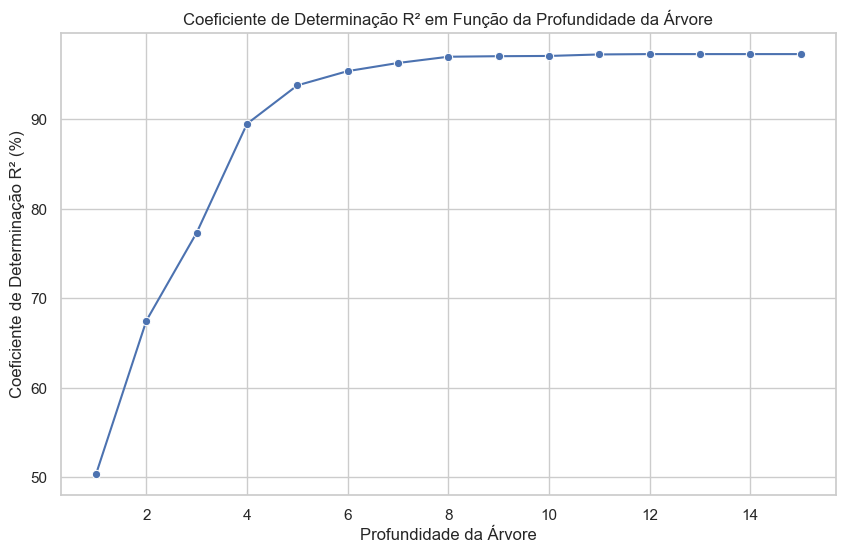

In [59]:
import numpy as np

depths = np.arange(1, 16)  # Profundidades de 1 a 15

results = []  # Para armazenar os resultados

for depth in depths:
    tree = DecisionTreeRegressor(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    predicao = tree.predict(X_test)
    r2 = r2_score(y_test, predicao) * 100
    results.append((depth, r2))

# Criar um DataFrame para os resultados
df_results = pd.DataFrame(results, columns=['Profundidade', 'R2'])

# Plotar o gráfico de linha usando o Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='Profundidade', y='R2', marker='o')

plt.title('Coeficiente de Determinação R² em Função da Profundidade da Árvore')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Coeficiente de Determinação R² (%)')

# Imprimir os resultados formatados
for depth, r2 in results:
    print(f'Coeficiente de determinação R² da previsão: {r2:.2f}% com {depth} de profundidade')

plt.show()

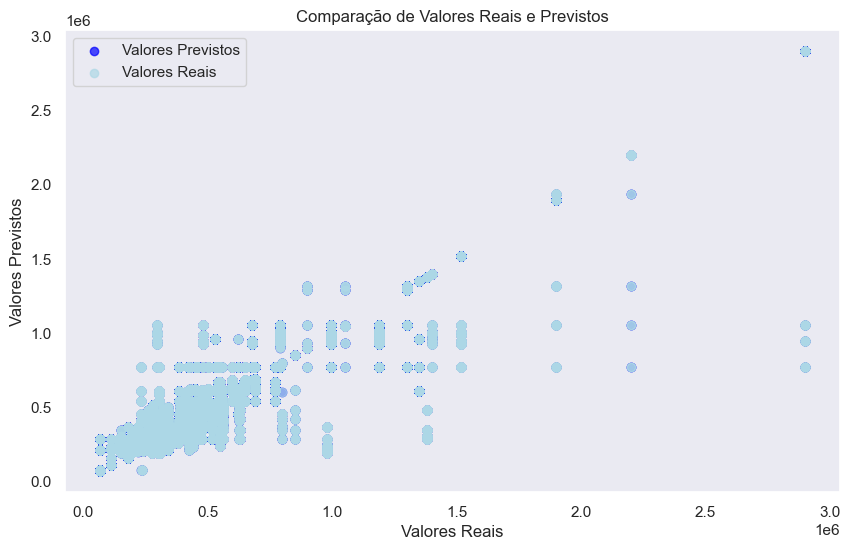

In [60]:
depths = np.arange(1, 16)  # Profundidades de 1 a 15

results = []  # Para armazenar os resultados

for depth in depths:
    tree = DecisionTreeRegressor(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    predicao = tree.predict(X_test)
    r2 = r2_score(y_test, predicao) * 100
    results.append((depth, r2))

# Criar um DataFrame para os resultados
df_results = pd.DataFrame(results, columns=['Profundidade', 'R2'])

# Criar as listas para valores reais e previstos
y_real = []
y_pred = []

for depth in depths:
    tree = DecisionTreeRegressor(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    predicao = tree.predict(X_test)
    y_real.extend(y_test)  # Estender a lista com os valores reais
    y_pred.extend(predicao)  # Estender a lista com os valores previstos

# Criar o gráfico de dispersão
sns.set_style('dark')
plt.figure(figsize=(10, 6))
plt.scatter(y_real, y_pred, marker='o', color='blue', alpha=0.7, label='Valores Previstos')
plt.scatter(y_real, y_pred, marker='o', color='lightblue', alpha=0.7, label='Valores Reais')

plt.title('Comparação de Valores Reais e Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()

plt.show()

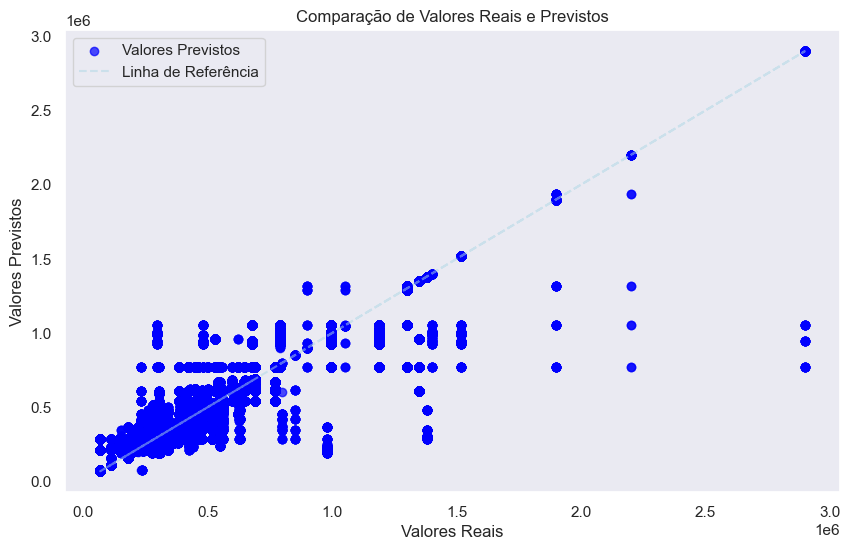

In [61]:
depths = np.arange(1, 16)  # Profundidades de 1 a 15

results = []  # Para armazenar os resultados

for depth in depths:
    tree = DecisionTreeRegressor(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    predicao = tree.predict(X_test)
    r2 = r2_score(y_test, predicao) * 100
    results.append((depth, r2))

# Criar um DataFrame para os resultados
import pandas as pd
df_results = pd.DataFrame(results, columns=['Profundidade', 'R2'])

# Criar as listas para valores reais e previstos
y_real = []
y_pred = []

for depth in depths:
    tree = DecisionTreeRegressor(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    predicao = tree.predict(X_test)
    y_real.extend(y_test)  # Estender a lista com os valores reais
    y_pred.extend(predicao)  # Estender a lista com os valores previstos

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_real, y_pred, marker='o', color='blue', alpha=0.7, label='Valores Previstos')
plt.plot(y_real, y_real, color='lightblue', alpha=0.5, linestyle='--', label='Linha de Referência')

plt.title('Comparação de Valores Reais e Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()

plt.show()

# Validação cruzada (cross-validation) para avaliar o desempenho do modelo de maneira mais robusta e confiável.
A validação cruzada (cross-validation)é usada para avaliar a capacidade de generalização de um modelo de Machine Learning e para estimar o desempenho do modelo em dados não vistos. A ideia principal por trás da validação cruzada é dividir os dados disponíveis em conjuntos de treinamento e teste de maneira iterativa, permitindo uma avaliação mais confiável do modelo.

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Crie o modelo de árvore de decisão
tree = DecisionTreeRegressor(random_state=0, max_depth=12)

# Defina a métrica de avaliação como o coeficiente de determinação R²
scoring = make_scorer(r2_score)

# Realize a validação cruzada
cv_scores = cross_val_score(tree, X_train, y_train, cv=50, scoring=scoring)

# Imprima os resultados
for fold, score in enumerate(cv_scores, start=1):
    print(f'R² na dobra {fold}: {score:.4f}')

# Calcule a média dos scores de validação cruzada
mean_cv_score = np.mean(cv_scores)
print(f'Média dos R² na validação cruzada: {mean_cv_score:.4f}')

R² na dobra 1: 0.9598
R² na dobra 2: 0.9819
R² na dobra 3: 0.9618
R² na dobra 4: 0.9772
R² na dobra 5: 0.9750
R² na dobra 6: 0.9728
R² na dobra 7: 0.9608
R² na dobra 8: 0.9678
R² na dobra 9: 0.9749
R² na dobra 10: 0.9742
R² na dobra 11: 0.9725
R² na dobra 12: 0.9738
R² na dobra 13: 0.9614
R² na dobra 14: 0.9744
R² na dobra 15: 0.9613
R² na dobra 16: 0.9785
R² na dobra 17: 0.9723
R² na dobra 18: 0.9730
R² na dobra 19: 0.9731
R² na dobra 20: 0.9745
R² na dobra 21: 0.9819
R² na dobra 22: 0.9737
R² na dobra 23: 0.9705
R² na dobra 24: 0.9765
R² na dobra 25: 0.9823
R² na dobra 26: 0.9733
R² na dobra 27: 0.9588
R² na dobra 28: 0.9733
R² na dobra 29: 0.9662
R² na dobra 30: 0.9711
R² na dobra 31: 0.9784
R² na dobra 32: 0.9839
R² na dobra 33: 0.9675
R² na dobra 34: 0.9783
R² na dobra 35: 0.9732
R² na dobra 36: 0.9797
R² na dobra 37: 0.9726
R² na dobra 38: 0.9730
R² na dobra 39: 0.9774
R² na dobra 40: 0.9767
R² na dobra 41: 0.9785
R² na dobra 42: 0.9785
R² na dobra 43: 0.9689
R² na dobra 44: 0.97

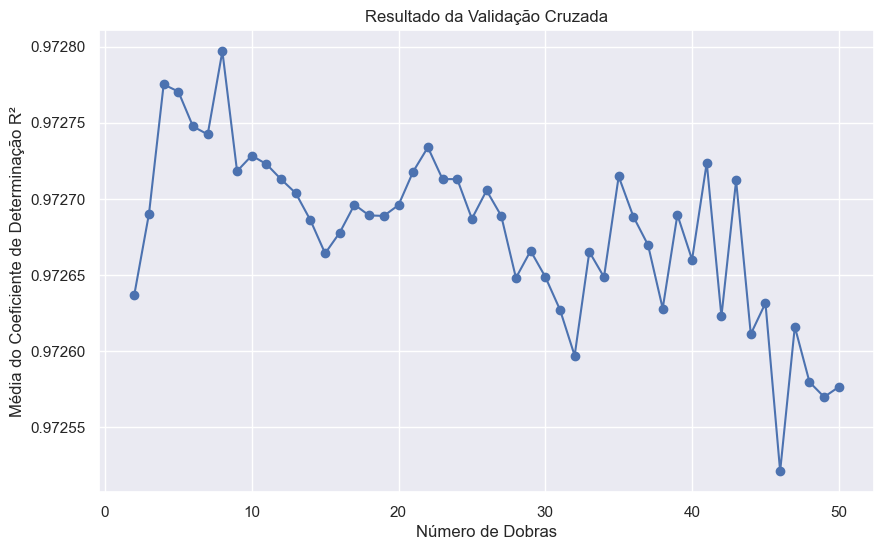

In [63]:
# Modelo de árvore de decisão
tree = DecisionTreeRegressor(random_state=0, max_depth=12)

# Métrica de avaliação como o coeficiente de determinação R²
scoring = make_scorer(r2_score)
num_folds = np.arange(2,51)
mean_scores = []

for folds in num_folds:
    cv_scores = cross_val_score(tree, X_train, y_train, cv=folds, scoring=scoring,)
    mean_scores.append(np.mean(cv_scores))

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(num_folds, mean_scores, marker='o')
plt.title('Resultado da Validação Cruzada')
plt.xlabel('Número de Dobras')
plt.ylabel('Média do Coeficiente de Determinação R²')
plt.grid(True)
plt.show()

Coeficiente de determinação R² da previsão: 97.30
Perda de regressão de erro absoluto médio: 20131
Perda de regressão de erro quadrático médio: 3016064101
------------------------------------------------------------


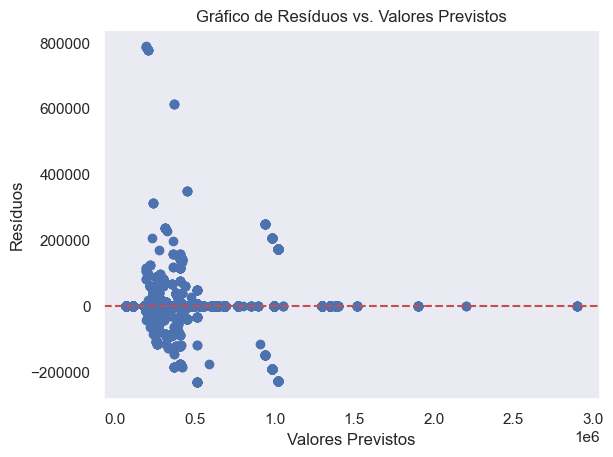

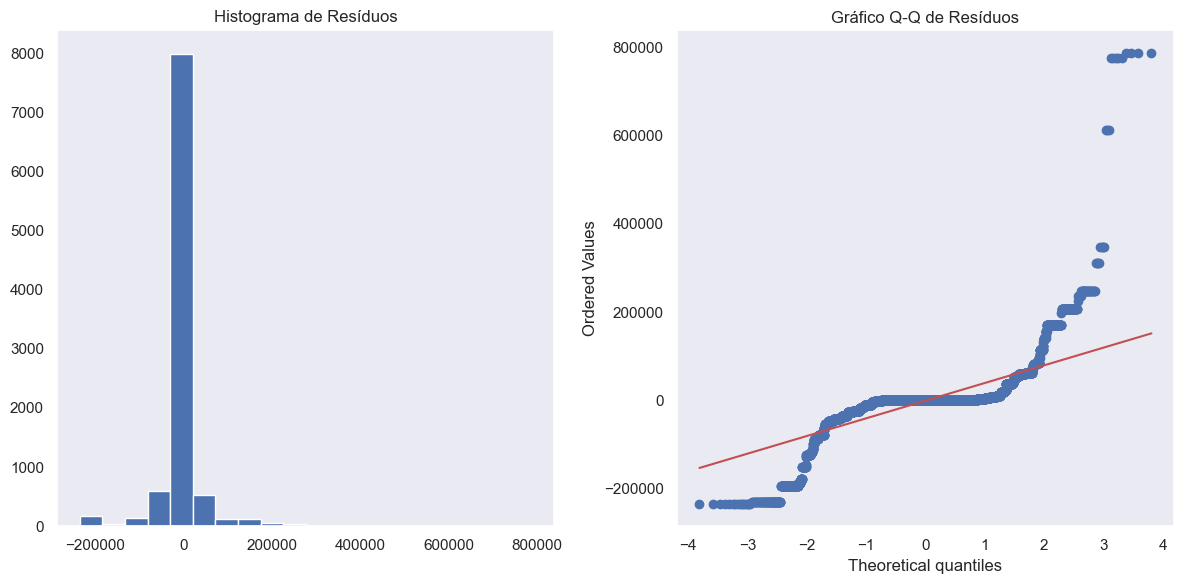

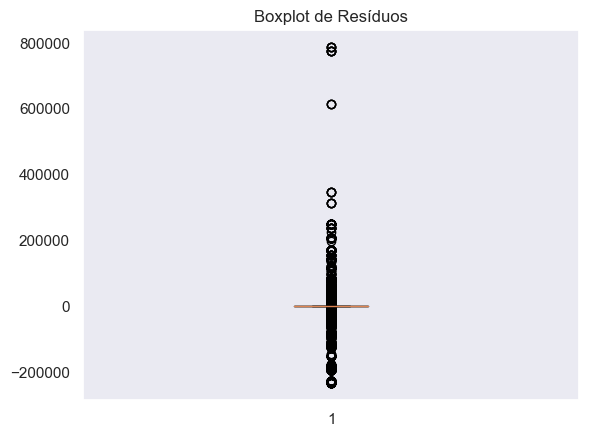

In [64]:
# Modelo de regressão de árvore de decisão
tree = DecisionTreeRegressor(random_state=0, max_depth=12)
tree.fit(X_train, y_train)
predicao = tree.predict(X_test)

# Calculando e imprimindo as métricas
metricas(predicao)

# Gráfico de Resíduos vs. Valores Previstos
residuos = y_test - predicao
plt.scatter(predicao, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

# Histograma e Gráfico Q-Q de Resíduos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuos, bins=20)
plt.title('Histograma de Resíduos')

plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Resíduos')

plt.tight_layout()
plt.show()

# Análise de Outliers
plt.boxplot(residuos)
plt.title('Boxplot de Resíduos')
plt.show()

### Explicação de cada gráfico

- Gráfico de Resíduos vs. Valores Previstos:
Nesse gráfico, os valores previstos pelo modelo são plotados no eixo horizontal e os resíduos (diferenças entre os valores reais e previstos) são plotados no eixo vertical. Um padrão uniformemente disperso em torno da linha horizontal zero é indicativo de um bom ajuste do modelo. Se houver algum padrão sistemático (como cone, funil ou curva), isso pode sugerir que o modelo está subestimando ou superestimando consistentemente certos valores.

- Histograma de Resíduos:
O histograma mostra a distribuição dos resíduos. Uma distribuição aproximadamente normal (simétrica em torno de zero) é um sinal positivo, indicando que o modelo está capturando bem os padrões nos dados. Desvios significativos da normalidade podem indicar problemas na modelagem.

- Gráfico Q-Q de Resíduos:
O gráfico Quantile-Quantile (Q-Q) compara a distribuição dos resíduos com a distribuição normal. Se os pontos no gráfico seguirem aproximadamente a linha diagonal, isso sugere que os resíduos estão próximos de uma distribuição normal. Desvios significativos da linha diagonal podem indicar desvios da normalidade.

- Boxplot de Resíduos:
O boxplot exibe a distribuição dos resíduos de forma visual. Ele ajuda a identificar a presença de outliers (valores extremos) nos resíduos. Outliers podem indicar casos incomuns ou erros nos dados.

### Explicação dos resultados calculados

- RMSE (Root Mean Squared Error):
O RMSE mede a raiz quadrada da média dos erros quadrados entre os valores reais e as previsões do modelo. Quanto menor o RMSE, melhor o modelo se ajusta aos dados. Um valor de RMSE de 54918.70 indica que, em média, o erro nas previsões é de cerca de 54918.70 unidades da medida da variável dependente.

- MAE (Mean Absolute Error):
O MAE calcula a média dos valores absolutos dos erros entre os valores reais e as previsões. Ele fornece uma ideia do tamanho médio dos erros de previsão. Um valor de MAE de 20130.65 indica que, em média, o erro absoluto nas previsões é de cerca de 20130.65 unidades da medida da variável dependente.

- R² (Coefficient of Determination):
O R² é uma medida da proporção da variabilidade total dos dados que é explicada pelo modelo. Ele varia entre 0 e 1, sendo 1 indicativo de um ajuste perfeito do modelo aos dados. Um valor de R² de 0.97 indica que o modelo de árvore de decisão está explicando cerca de 97% da variabilidade observada nos dados.

- Resumo:
Um R² alto e valores de RMSE e MAE relativamente baixos sugerem que o modelo está se ajustando bem aos dados e fazendo previsões precisas.

# Algoritmos de detecção de anomalias

#### Isolation Forest:
O Isolation Forest é um algoritmo de detecção de anomalias baseado em árvores de decisão. Ele isola as observações que são raras e diferentes das outras observações. Em geral, as anomalias são mais fáceis de isolar do que as observações normais.

No caso do Isolation Forest, as previsões são rótulos binários (1 para normal e -1 para anomalia). Analise a proporção de -1s em relação ao número total de previsões para ter uma ideia da taxa de detecção de anomalias. Além disso, observe a distribuição das previsões de -1 em relação aos pontos de dados. Plote um gráfico de dispersão ou histograma para visualizar como as anomalias estão distribuídas nos dados.

In [65]:
X = df.drop('preco', axis=1)

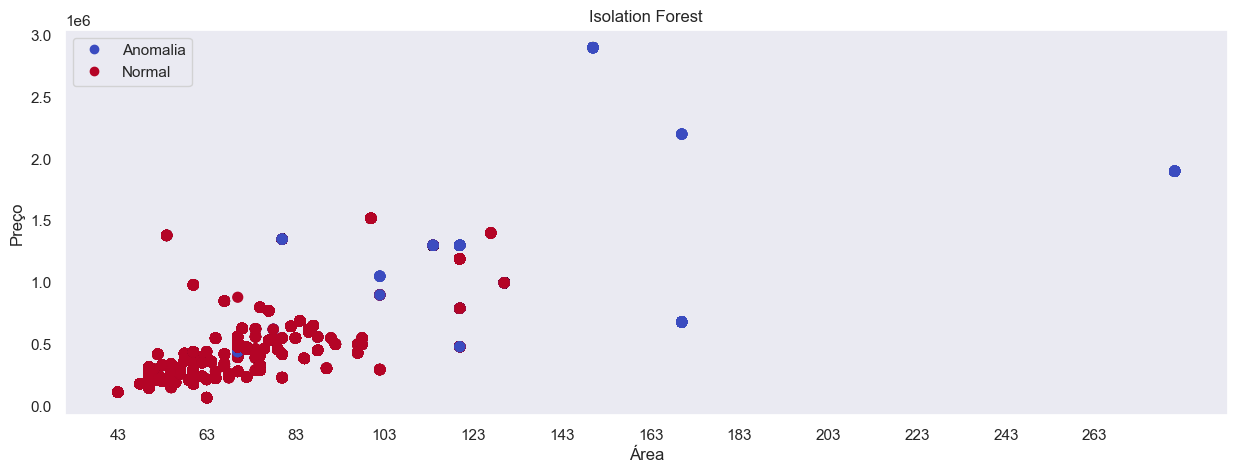

In [66]:
from sklearn.ensemble import IsolationForest

# Modelo Isolation Forest
#contamination=0.05: O parâmetro contamination controla a proporção estimada de pontos de dados que são considerados anomalias.
# Nesse caso, contamination=0.05 significa que você está assumindo que cerca de 5% dos pontos de dados são anomalias.
isolation_forest = IsolationForest(contamination=0.05, random_state=0)

# Treine o modelo com os dados
isolation_forest.fit(X)

# Classifique os pontos como anomalias (1) ou normais (-1)
pred_isolation_forest = isolation_forest.predict(X)

# Ajustando o tamanho dos gráficos
plt.figure(figsize=(15, 5))

# Gráfico para Isolation Forest
scatter = plt.scatter(df["area"], df["preco"], c=pred_isolation_forest, cmap='coolwarm', s=50)

# Obtenha os rótulos únicos das previsões do Isolation Forest (1 para normal, -1 para anomalia)
unique_labels = np.unique(pred_isolation_forest)
legend_labels = ["Anomalia","Normal"]

# Adicione uma entrada na legenda para cada rótulo
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc="upper left")

plt.title('Isolation Forest')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.xticks(np.arange(min(df["area"]), max(df["area"])+1, 20))
plt.show()

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
O DBSCAN é um algoritmo de agrupamento que também pode ser usado para detectar anomalias. Ele se baseia na densidade dos pontos e agrupa pontos próximos em clusters, considerando pontos isolados como outliers.

No DBSCAN, as previsões são rótulos de clusters, onde valores negativos indicam pontos classificados como ruído ou outliers. Verifique a quantidade de pontos que foram classificados como -1 (anomalias) em relação ao total de pontos. Além disso, observe como os clusters são formados e como os pontos são agrupados. Isso pode ajudar a entender quais regiões dos dados são consideradas mais densas e quais são consideradas isoladas.

eps=0.5: O parâmetro eps (epsilon) é um valor que define a distância máxima entre dois pontos para que sejam considerados vizinhos. Em outras palavras, ele determina o raio em torno de cada ponto que será examinado para determinar a densidade de pontos. Pontos dentro dessa distância são considerados parte do mesmo grupo (cluster).

min_samples=5: O parâmetro min_samples especifica o número mínimo de pontos dentro do raio eps para que um ponto seja considerado um "core point" (ponto central). Pontos que não possuem pelo menos min_samples vizinhos dentro do raio eps são considerados pontos de borda ou pontos de ruído.

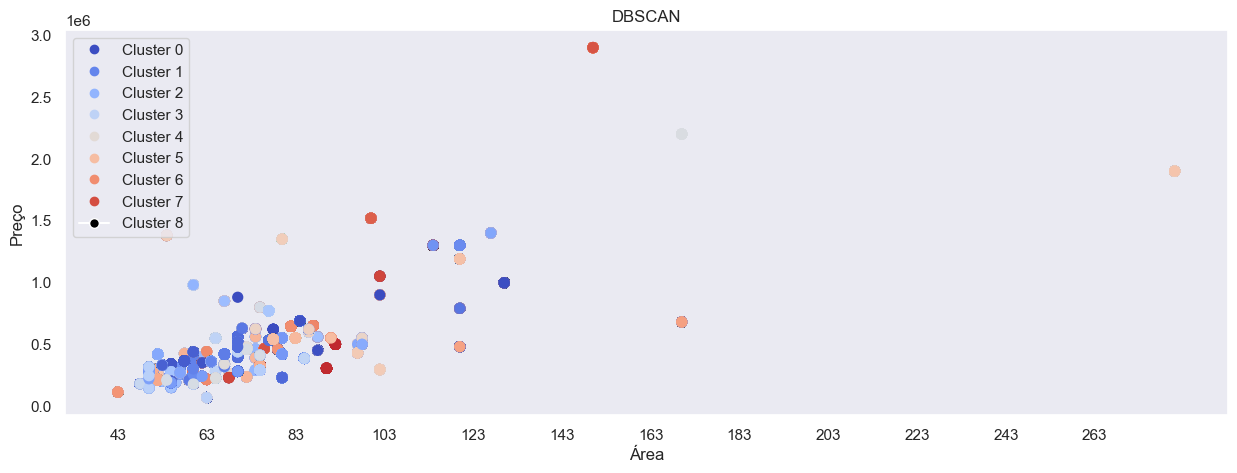

In [67]:
from sklearn.cluster import DBSCAN

# Modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajuste o modelo aos dados
dbscan.fit(X)

# Obtenha as previsões de cluster (valores negativos são outliers)
pred_dbscan = dbscan.fit_predict(X)

# Gráfico para DBSCAN
plt.figure(figsize=(15, 5))
scatter = plt.scatter(df["area"], df["preco"], c=pred_dbscan, cmap='coolwarm', s=50)

# Obtenha os rótulos únicos dos clusters (excluindo outliers)
unique_labels = np.unique(pred_dbscan[pred_dbscan != -1])
legend_labels = [f"Cluster {label}" for label in unique_labels]

# Adicione uma entrada na legenda para cada cluster
plt.legend(handles=scatter.legend_elements()[0] + [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=7, label='Anomalias')],
           labels=legend_labels + ['Anomalias'], loc="upper left")

plt.title('DBSCAN')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.xticks(np.arange(min(df["area"]), max(df["area"])+1, 20))
plt.show()

#### One-Class SVM:
A One-Class SVM é um algoritmo de aprendizado de máquina que é treinado apenas em uma classe de dados (os dados normais) e, em seguida, pode ser usado para identificar anomalias com base na distância em relação à classe normal.

Na One-Class SVM, as previsões também são rótulos binários (1 para normal e -1 para anomalia). Assim como no Isolation Forest, analise a proporção de -1s em relação ao número total de previsões para avaliar a taxa de detecção de anomalias. Além disso, observe a distribuição das previsões de -1 em relação aos dados e tente identificar quais pontos específicos estão sendo classificados como anomalias.

OneClassSVM: Essa é a classe do algoritmo One-Class SVM. Provavelmente, você importou essa classe de uma biblioteca como o sklearn.svm.

nu=0.05: O parâmetro nu controla a proporção estimada de pontos de dados que são considerados anomalias. Nesse caso, nu=0.05 significa que você está assumindo que cerca de 5% dos pontos de dados são anomalias.

kernel='rbf': O parâmetro kernel define o tipo de função de kernel a ser usado no SVM. No caso 'rbf' (Radial Basis Function), que é uma função de kernel popular usada para SVMs, especialmente em problemas de alta dimensionalidade.

gamma=0.1: O parâmetro gamma é um hiperparâmetro da função de kernel rbf. Ele controla o quanto cada ponto de treinamento influencia em relação aos pontos de teste. Um valor baixo de gamma pode resultar em uma superfície de decisão mais suave, enquanto um valor alto pode levar a uma superfície de decisão mais complexa que se ajusta mais aos pontos de treinamento.

Após a execução desse código, a variável one_class_svm conterá um modelo treinado da One-Class SVM com os parâmetros especificados. Você pode usar esse modelo para identificar anomalias em novos conjuntos de dados, onde o algoritmo tentará identificar quais pontos de dados são considerados anômalos com base no padrão que ele aprendeu durante o treinamento. A One-Class SVM é particularmente útil quando você possui um conjunto de dados em que a maioria dos pontos é normal e apenas uma pequena proporção é anômala.

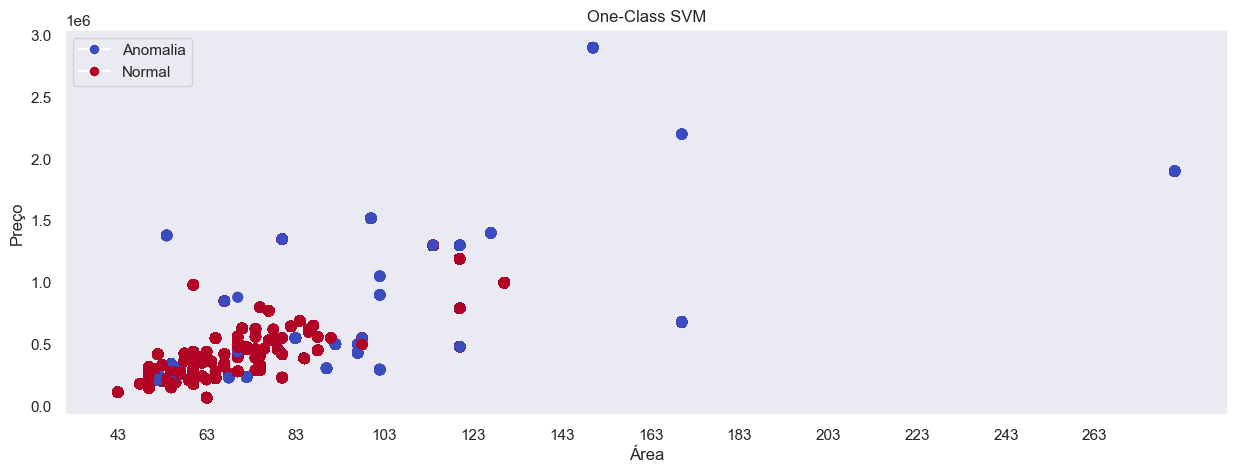

In [68]:
from sklearn.svm import OneClassSVM

# Crie o modelo One-Class SVM
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)

# Treine o modelo na classe normal
one_class_svm.fit(X)

# Classifique os pontos como normais (1) ou anomalias (-1)
pred_one_class_svm = one_class_svm.predict(X)

# Gráfico para One-Class SVM
plt.figure(figsize=(15, 5))

# Gráfico para One-Class SVM
scatter = plt.scatter(df["area"], df["preco"], c=pred_one_class_svm, cmap='coolwarm', s=50)

# Obtenha os rótulos únicos das previsões do One-Class SVM (1 para normal, -1 para anomalia)
unique_labels = np.unique(pred_one_class_svm)
legend_labels = ["Anomalia","Normal"]

# Crie uma legenda personalizada para cada rótulo
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=scatter.cmap(scatter.norm(unique_label))) for unique_label, label in zip(unique_labels, legend_labels)]

plt.legend(handles=legend_handles, loc="upper left")

plt.title('One-Class SVM')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.xticks(np.arange(min(df["area"]), max(df["area"])+1, 20))
plt.show()


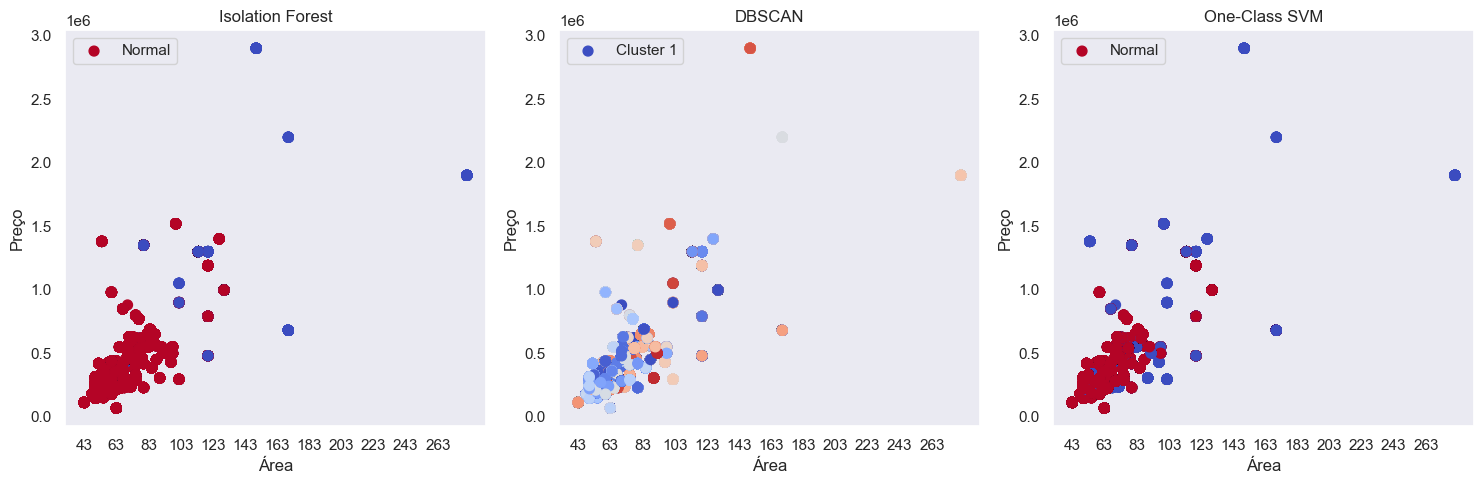

In [69]:
# Plotagem dos 3 resultados

# Ajustando o tamanho dos gráficos
plt.figure(figsize=(15, 5))

# Gráfico para Isolation Forest
plt.subplot(1, 3, 1)
plt.scatter(df["area"], df["preco"], c=pred_isolation_forest, cmap='coolwarm', s=50)
plt.title('Isolation Forest')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.legend(["Normal", "Anomalia"], loc="upper left")
plt.xticks(np.arange(min(df["area"]), max(df["area"])+1, 20))

# Gráfico para DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(df["area"], df["preco"], c=pred_dbscan, cmap='coolwarm', s=50)
plt.title('DBSCAN')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.legend(["Cluster 1", "Cluster 2", "Anomalias"], loc="upper left")
plt.xticks(np.arange(min(df["area"]), max(df["area"])+1, 20))

# Gráfico para One-Class SVM
plt.subplot(1, 3, 3)
plt.scatter(df["area"], df["preco"], c=pred_one_class_svm, cmap='coolwarm', s=50)
plt.title('One-Class SVM')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.legend(["Normal", "Anomalia"], loc="upper left")
plt.xticks(np.arange(min(df["area"]), max(df["area"])+1, 20))

plt.tight_layout()
plt.show()

#### Excluindo as anomalias dos resultados dos três modelos (Isolation Forest, DBSCAN e One-Class SVM) e criar um novo DataFrame contendo apenas as instâncias rotuladas como "Normal" por todos os três modelos.

- pred_isolation_forest == 1: O ponto é considerado normal pelo Isolation Forest.
- pred_dbscan != -1: O ponto não é um ponto de ruído (anomalia) de acordo com o DBSCAN.
- pred_one_class_svm == 1: O ponto é considerado normal pela One-Class SVM.

In [70]:
# Criando um novo DataFrame excluindo as anomalias
df_sem_anomalias = df[(pred_isolation_forest == 1) & (pred_dbscan != -1) & (pred_one_class_svm == 1)]
df_sem_anomalias

area  quartos  banheiros  garagem   preco
0       130        2          2        1  997000
2        88        1          1        1  450000
3        84        1          2        1  689000
4        62        1          2        2  350000
9        60        3          2        1  300000
...     ...      ...        ...      ...     ...
66486    80        2          3        1  419000
66487    50        3          1        1  219999
66488    50        1          1        1  245000
66489    78        2          2        1  540000
66491    91        2          2        1  550000

[40345 rows x 5 columns]

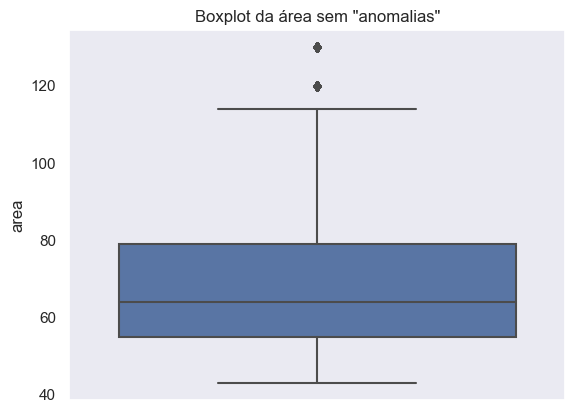

In [71]:
ax=sns.boxplot(data=df_sem_anomalias, y='area')
plt.title('Boxplot da área sem "anomalias"')
ax=ax

In [72]:
# Analisando novamente o modelo com os novos dados
X = df_sem_anomalias.drop(columns=['preco'])
y = df_sem_anomalias['preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

In [73]:
tree = DecisionTreeRegressor(random_state=0, max_depth=22)
tree.fit(X_train,y_train)
predicao = tree.predict(X_test)
metricas(predicao)

Coeficiente de determinação R² da previsão: 96.40
Perda de regressão de erro absoluto médio: 21441
Perda de regressão de erro quadrático médio: 2973786684
------------------------------------------------------------


In [74]:
for i in range(1,16):
    tree = DecisionTreeRegressor(random_state=0, max_depth=i)
    tree.fit(X_train,y_train)
    predicao = tree.predict(X_test)
    print(f'Max_depth == {i}')
    metricas(predicao)

Max_depth == 1
Coeficiente de determinação R² da previsão: 52.71
Perda de regressão de erro absoluto médio: 138862
Perda de regressão de erro quadrático médio: 39067889980
------------------------------------------------------------
Max_depth == 2
Coeficiente de determinação R² da previsão: 73.25
Perda de regressão de erro absoluto médio: 101754
Perda de regressão de erro quadrático médio: 22103044545
------------------------------------------------------------
Max_depth == 3
Coeficiente de determinação R² da previsão: 82.07
Perda de regressão de erro absoluto médio: 77322
Perda de regressão de erro quadrático médio: 14814057106
------------------------------------------------------------
Max_depth == 4
Coeficiente de determinação R² da previsão: 92.59
Perda de regressão de erro absoluto médio: 53365
Perda de regressão de erro quadrático médio: 6121134166
------------------------------------------------------------
Max_depth == 5
Coeficiente de determinação R² da previsão: 94.65
Perda 

### Resultado sem as anomalias:

Após a remoção das anomalias, os resultados do modelo de regressão melhoraram consideravelmente em termos de métricas de avaliação. O ajuste do hiperparâmetro max_depth parece ter tido um impacto positivo nos resultados. Observações com base nos resultados:

- RMSE (Root Mean Square Error): O RMSE diminuiu à medida que aumentou o max_depth, indicando que o modelo está se ajustando melhor aos dados após a remoção das anomalias. Isso significa que as previsões estão mais próximas dos valores reais.

- MAE (Mean Absolute Error): O MAE também diminuiu, o que é uma boa indicação de que as previsões estão mais precisas após a remoção das anomalias. O MAE mede a magnitude dos erros de previsão.

- R² (Coefficient of Determination): O R² aumentou à medida que o max_depth aumentou, o que é positivo. O R² agora está mais próximo de 1, o que significa que o modelo está explicando uma maior proporção da variabilidade dos dados.

### Aplicando validação cruzada:

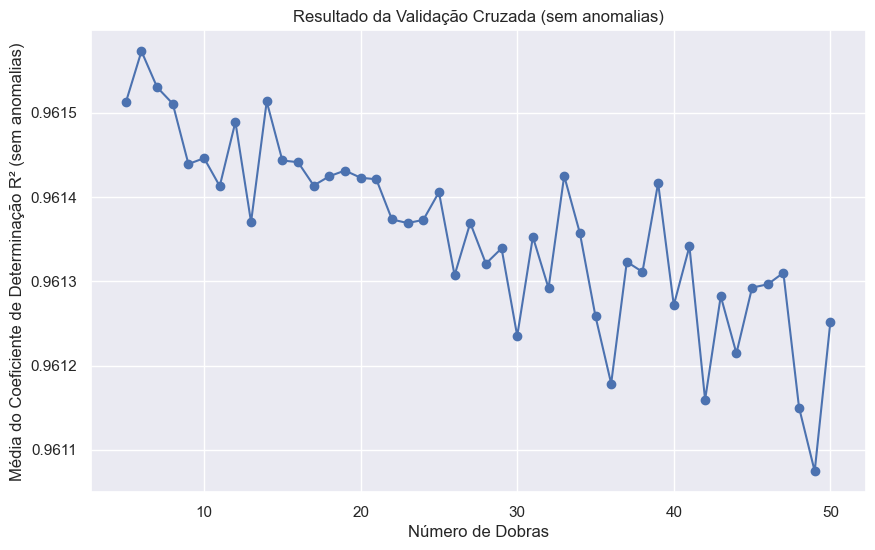

In [75]:
# Crie o modelo de árvore de decisão
tree = DecisionTreeRegressor(random_state=0, max_depth=12)

# Defina a métrica de avaliação como o coeficiente de determinação R²
scoring = make_scorer(r2_score)

# Realize a validação cruzada com diferentes números de dobras
num_folds = np.arange(5, 51)  # Números de dobras de 5 a 50
mean_scores = []

for folds in num_folds:
    cv_scores = cross_val_score(tree, X_train, y_train, cv=folds, scoring=scoring,)
    mean_scores.append(np.mean(cv_scores))

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(num_folds, mean_scores, marker='o')
plt.title('Resultado da Validação Cruzada (sem anomalias)')
plt.xlabel('Número de Dobras')
plt.ylabel('Média do Coeficiente de Determinação R² (sem anomalias)')
plt.grid(True)
plt.show()

# Selecionando as 2 melhores variáveis explicativas

In [76]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separando os dados e alvos
X = df_sem_anomalias.drop("preco", axis=1)
y = df_sem_anomalias["preco"]

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Criando o seletor SelectKBest com testes de regressão
selector = SelectKBest(score_func=f_regression, k=2)  # Selecionando as melhores 2 variáveis

# Aplicando o seletor aos dados de treinamento
X_train_selected = selector.fit_transform(X_train, y_train)

# Obtendo as máscaras das variáveis selecionadas
mask = selector.get_support()

# Obtendo os índices das variáveis selecionadas
selected_features_indices = np.where(mask)[0]

# Obtendo os nomes das variáveis selecionadas
selected_features = X.columns[selected_features_indices]

print("Variáveis selecionadas:", selected_features)

Variáveis selecionadas: Index(['area', 'banheiros'], dtype='object')


In [77]:
# Separando os dados e alvos
X = df_sem_anomalias[['area','banheiros']]

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

for i in range(1,16):
    tree = DecisionTreeRegressor(random_state=0, max_depth=i)
    tree.fit(X_train,y_train)
    predicao = tree.predict(X_test)
    print(f'Max_depth = {i}')
    metricas(predicao)

Max_depth = 1
Coeficiente de determinação R² da previsão: 52.05
Perda de regressão de erro absoluto médio: 141025
Perda de regressão de erro quadrático médio: 39775642992
------------------------------------------------------------
Max_depth = 2
Coeficiente de determinação R² da previsão: 71.02
Perda de regressão de erro absoluto médio: 103971
Perda de regressão de erro quadrático médio: 24041316210
------------------------------------------------------------
Max_depth = 3
Coeficiente de determinação R² da previsão: 80.17
Perda de regressão de erro absoluto médio: 79693
Perda de regressão de erro quadrático médio: 16451389973
------------------------------------------------------------
Max_depth = 4
Coeficiente de determinação R² da previsão: 87.80
Perda de regressão de erro absoluto médio: 63922
Perda de regressão de erro quadrático médio: 10118058532
------------------------------------------------------------
Max_depth = 5
Coeficiente de determinação R² da previsão: 94.51
Perda de r

#### Resultados com todas as variáveis (Max_depth = 15):

RMSE: 54532.44
MAE: 21440.84
R²: 0.9640

##### Resultados após a remoção de duas variáveis (Max_depth = 15):

RMSE: 59463.33
MAE: 24492.82
R²: 0.9574

#### Comparando esses dois conjuntos de resultados:

- RMSE: No conjunto de resultados com todas as variáveis, o RMSE é menor (54532.44) em comparação com o conjunto de resultados após a remoção de duas variáveis (59463.33). Isso indica que o modelo com todas as variáveis está produzindo previsões mais precisas em relação aos valores reais, quando comparado ao modelo após a remoção das variáveis.

- MAE: Similarmente, o MAE no conjunto de resultados com todas as variáveis (21440.84) é menor do que no conjunto de resultados após a remoção de variáveis (24492.82). Isso sugere que o modelo com todas as variáveis tem uma média de erro menor em relação às previsões, quando comparado ao modelo com a remoção das variáveis.

- R²: O coeficiente de determinação R² no conjunto de resultados com todas as variáveis (0.9640) é maior do que no conjunto de resultados após a remoção de variáveis (0.9574). Um valor maior de R² indica que o modelo com todas as variáveis está explicando uma maior proporção da variabilidade total nos dados.

Em resumo, os resultados indicam que o modelo com todas as variáveis produz um desempenho melhor em relação às métricas de avaliação (RMSE, MAE e R²) do que o modelo após a remoção de duas variáveis. Isso sugere que as variáveis removidas podem ter contribuído positivamente para a capacidade do modelo de fazer previsões mais precisas e explicar a variabilidade nos dados.

# Criando um modelo simples de previsão:

In [78]:
X = df_sem_anomalias.drop(columns=['preco'])
y = df_sem_anomalias['preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)
tree = DecisionTreeRegressor(random_state=0, max_depth=7)
tree.fit(X_train,y_train)

area = int(input('Qual a área desejada de todo apartamento em metros quadrados? (ex: 50) '))
quartos = int(input('Quantos quartos? (ex: 2)'))
banheiros = int(input('Quantos banheiros em todo apartamento? (ex: 3) '))
garagem = int(input('Quantas vagas em garagem? (ex: 1)'))
entrada=[[area, quartos, banheiros, garagem]]

print(f'Previsão do valor do Apartamento de {area} m², {quartos} quarto(s), {banheiros} banheiro(s) e {garagem} vaga(s) de garagem é de: R$ {tree.predict(entrada)[0]:.0f}')
print(' ')
print(' ')
print(' ')
print(' ')

Qual a área desejada de todo apartamento em metros quadrados? (ex: 50) 50
Quantos quartos? (ex: 2)2
Quantos banheiros em todo apartamento? (ex: 3) 2
Quantas vagas em garagem? (ex: 1)1
Previsão do valor do Apartamento de 50 m², 2 quarto(s), 2 banheiro(s) e 1 vaga(s) de garagem é de: R$ 378192
 
 
 
 


C:\Users\otaci\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [79]:
# # Loop da previsão:
# def get_user_input():
#     area = int(input('Qual a área desejada de todo apartamento em metros quadrados? (ex: 50) '))
#     quartos = int(input('Quantos quartos? (ex: 2)'))
#     banheiros = int(input('Quantos banheiros em todo apartamento? (ex: 3) '))
#     garagem = int(input('Quantas vagas em garagem? (ex: 1)'))
#     return [[area, quartos, banheiros, garagem]]

# def predict_apartment_value(tree, input_data):
#     predicted_value = tree.predict(input_data)[0]
#     return predicted_value

# def main():
#     X = df_sem_anomalias.drop(columns=['preco'])
#     y = df_sem_anomalias['preco']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)
#     tree = DecisionTreeRegressor(random_state=0, max_depth=7)
#     tree.fit(X_train, y_train)

#     while True:
#         input_data = get_user_input()
#         predicted_value = predict_apartment_value(tree, input_data)
#         print(f'Previsão do valor do Apartamento de {input_data[0][0]} m², {input_data[0][1]} quarto(s), {input_data[0][2]} banheiro(s) e {input_data[0][3]} vaga(s) de garagem é de: R$ {predicted_value:.0f}')
#         print('\n' * 4)

# if __name__ == "__main__":
#     main()


### Plotando Árvore de Decisão

In [80]:
from sklearn.tree import plot_tree
plt.figure(dpi=1550)
plot_tree(tree, filled=True, proportion=True, rounded=True, fontsize=5, feature_names=X.columns.tolist())
plt.title("DecisionTree")
plt.show()